In [95]:
import os
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint
from IPython.display import clear_output

In [96]:
!pip install tensorflow-gpu==2.0.0-beta0
clear_output()

import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.9.2


In [97]:
# import logging
# logging.basicConfig(level="error")

# np.set_printoptions(suppress=True)

In [98]:
ch_vocab_file = "/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/ch_vocab_new"
tai_vocab_file = "/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/tai_vocab_new"
checkpoint_path = "/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/checkpoints_new"
log_dir = "/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/logs"
download_dir = "/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/tensorflow-datasets/downloads"

# if not os.path.exists(output_dir):
#   os.makedirs(output_dir)

In [99]:
# from google drive import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
del_list =[0]
def processString(txt):
  # specialChars = "！#$%^&*()；，。ＥＣＦＡＢ、﹔、,＊《 」" 
  # for specialChar in specialChars:
  #   txt = txt.replace(specialChar,'')
  #print(txt) # A,Quick,brown,fox,jumped,over,the,lazy,dog
  #txt = txt.replace('-', ' ')
  #print(txt) # A Quick brown fox jumped over the lazy dog 
  return txt 
def processString_ch(txt):
  #specialChars = "#$%^&*()（）⿰「」！、⿳；，。 ，,_。',、，。、'」「；！？：《》ＥＣＦＡＢ、﹔、,＊《 」" #-123456789
  specialChars = " "
  for specialChar in specialChars:
    txt = txt.replace(specialChar,'')
  #print(txt) # A,Quick,brown,fox,jumped,over,the,lazy,dog
  #print(txt) # A Quick brown fox jumped over the lazy dog 
  return txt 

In [101]:
import re

my_re = re.compile(r'[a-zA-Z0-9_]')

my_str_1 = '我是as誰'
my_str_2 = '我是誰。'
print(bool(re.search(my_re, my_str_1)))
print(bool(re.search(my_re, my_str_2)))

True
False


In [102]:
import pandas as pd
data_path = "/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/"
train_y_path = "/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/train-TL.csv"
train_x_path = "/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/train-ZH.csv"
test_x_path = "/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/test-ZH-nospace.csv"
train_path = "/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/train_translate.csv"
valid_path = "/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/valid_translate.csv"
# wavs_path = data_path + "/train/new/"
# metadata_path = data_path + "/train-toneless.csv"


# Read metadata file and parse it
train_x = pd.read_csv(train_x_path, sep=",", header=None)#, quoting=2
#metadata_df.head(3)
train_x.columns = ["id", "txt"]
train_x = train_x[["id", "txt"]]
#train_x = train_x.drop(0)
count = 0;
for index,row in train_x.iterrows():
  id = row["id"]
  txt = row["txt"]
  row["txt"] = processString_ch(txt)
  if(bool(re.search(my_re, txt))and count not in del_list):# 
    del_list.append(count)
  count = count+1;
print(del_list)
train_x = train_x.drop(del_list)
# data_df = metadata_df.drop(del_list)
# print(data_df.shape)

#train_xx = train_x.iloc[:60000]
train_xx = train_x
valid_x = train_x.iloc[60001:]
#train_y = train_y.sample(frac=1)#.reset_index(drop=True)
#train_y.head(3)
context_raw = train_xx["txt"].values
valid_x = valid_x["txt"].values
print(len(context_raw))
print(len(valid_x))





[0, 1, 3, 5, 7, 11, 13, 15, 16, 17, 22, 24, 25, 31, 32, 33, 35, 65, 66, 165, 227, 231, 236, 240, 242, 246, 247, 252, 253, 254, 255, 256, 258, 260, 365, 370, 371, 374, 375, 376, 378, 379, 380, 454, 563, 591, 610, 611, 622, 625, 690, 706, 707, 709, 710, 712, 713, 717, 720, 721, 722, 723, 724, 727, 729, 731, 732, 733, 734, 735, 736, 737, 739, 740, 741, 742, 745, 747, 748, 749, 750, 751, 753, 754, 755, 756, 757, 761, 762, 811, 815, 819, 820, 824, 825, 846, 868, 870, 872, 874, 875, 876, 877, 878, 882, 884, 885, 894, 895, 898, 900, 907, 949, 950, 966, 967, 1085, 1091, 1161, 1164, 1166, 1167, 1172, 1173, 1174, 1177, 1178, 1184, 1185, 1186, 1188, 1190, 1191, 1194, 1224, 1266, 1282, 1284, 1389, 1393, 1394, 1399, 1402, 1403, 1405, 1415, 1427, 1429, 1431, 1463, 1467, 1470, 1472, 1473, 1477, 1483, 1485, 1487, 1490, 1622, 1624, 1626, 1628, 1631, 1632, 1633, 1637, 1638, 1639, 1640, 1642, 1644, 1645, 1648, 1649, 1650, 1651, 1652, 1654, 1655, 1656, 1658, 1660, 1662, 1663, 1664, 1666, 1670, 1671, 1674,

In [103]:
# Read metadata file and parse it
train_y = pd.read_csv(train_y_path, sep=",", header=None)#, quoting=2
#metadata_df.head(3)

train_y.columns = ["id", "txt"]
train_y = train_y[["id", "txt"]]
#train_y = train_y.drop(0)

# count = 0;
# for index,row in train_y.iterrows():
#   id = row["id"]
#   text = row["text"]
#   if((text.islower()==False) and int(id) not in del_list):
#     del_list.append(count)
#   else:
#     for chara in text:
#       if (chara not in lexicon_list )and chara.isalpha():
#         del_list.append(count)
#   count = count+1;
# print(del_list)

# data_df = metadata_df.drop(del_list)
# print(data_df.shape)
for index,row in train_y.iterrows():
  id = row["id"]
  txt = row["txt"]
  row["txt"] = processString(txt)
  #print(row["txt"])


# for index,row in train_y.iterrows():
#   print(row["txt"])
train_y = train_y.drop(del_list)

#train_yy = train_y.iloc[:60000]
train_yy = train_y
valid_y = train_y.iloc[60001:]
#train_y = train_y.sample(frac=1)#.reset_index(drop=True)
#train_y.head(3)
target_raw = train_yy["txt"].values
valid_y = valid_y["txt"].values
print(len(target_raw))
print(len(valid_y))

62424
2423


In [104]:
import csv
train_x = pd.read_csv(train_x_path, sep=",", header=None)
train_y = pd.read_csv(train_x_path, sep=",", header=None)

with open("/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/train_translate.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ch', 'tw'])
    for x,y in zip (context_raw,target_raw):
        writer.writerow([x,y])

In [105]:
import csv
train_x = pd.read_csv(train_x_path, sep=",", header=None)
train_y = pd.read_csv(train_x_path, sep=",", header=None)

with open("/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/valid_translate.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ch', 'tw'])
    for x,y in zip (valid_x,valid_y):
        writer.writerow([x,y])

In [106]:
train_examples = tf.data.experimental.CsvDataset(
  train_path,
  [
   tf.string,tf.string  # Required field, use dtype or empty tensor
  ],
  header = True,
  select_cols=[0,1]  # Only parse last three columns
)
train_examples

<CsvDatasetV2 element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [107]:
val_examples = tf.data.experimental.CsvDataset(
  valid_path,
  [
   tf.string,tf.string  # Required field, use dtype or empty tensor
  ],
  header = True,
  select_cols=[0,1]  # Only parse last three columns
)
val_examples

<CsvDatasetV2 element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [108]:
for element in train_examples.as_numpy_iterator():
  print(element)
  break

(b'\xe9\xa7\x90\xe7\xbe\x8e\xe7\x89\xb9\xe6\xb4\xbe\xe5\x93\xa1\xe6\x9b\xb9\xe9\x83\x81\xe8\x8a\xac\xe8\x8f\xaf\xe5\xba\x9c\xe5\xa0\xb1\xe5\xb0\x8e', b'tsu3-bi2 tik8-phai3-uan5 tso5-hiok4-hun1 hua5-hu2 po3-to7')


In [109]:
for en, zh in train_examples.take(3):
  print(en)
  print(zh)
  print('-' * 10)



tf.Tensor(b'\xe9\xa7\x90\xe7\xbe\x8e\xe7\x89\xb9\xe6\xb4\xbe\xe5\x93\xa1\xe6\x9b\xb9\xe9\x83\x81\xe8\x8a\xac\xe8\x8f\xaf\xe5\xba\x9c\xe5\xa0\xb1\xe5\xb0\x8e', shape=(), dtype=string)
tf.Tensor(b'tsu3-bi2 tik8-phai3-uan5 tso5-hiok4-hun1 hua5-hu2 po3-to7', shape=(), dtype=string)
----------
tf.Tensor(b'\xe5\xa3\x93\xe5\x80\x92\xe6\x80\xa7\xe5\x8b\x9d\xe5\x88\xa9\xe5\x89\xb5\xe9\x80\xa0\xe6\x96\xb0\xe6\xad\xb7\xe5\x8f\xb2', shape=(), dtype=string)
tf.Tensor(b'ap4-to2-sing3 sing3-li7 tshong3-tso7 sin1-lik8-su2', shape=(), dtype=string)
----------
tf.Tensor(b'\xe7\x95\xb6\xe9\x81\xb8\xe7\xbe\x8e\xe5\x9c\x8b\xe6\xad\xb7\xe5\x8f\xb2\xe4\xb8\x8a\xe9\xa0\xad\xe4\xb8\x80\xe4\xbd\x8d\xe7\x83\x8f\xe4\xba\xba\xe7\xb8\xbd\xe7\xb5\xb1', shape=(), dtype=string)
tf.Tensor(b'tong3-suan2 bi2-kok4 lik8-su2 siong7 thau5-tsit8-ui7 oo1-lang5 tsong2-thong2', shape=(), dtype=string)
----------


In [110]:
sample_examples = []
num_samples = 10

for ch_t, zh_t in train_examples.take(num_samples):
  ch = ch_t.numpy().decode("utf-8")
  zh = zh_t.numpy().decode("utf-8")
  
  print(ch)
  print(zh)
  print('-' * 10)
  
  # 之後用來簡單評估模型的訓練情況
  sample_examples.append((ch, zh))

駐美特派員曹郁芬華府報導
tsu3-bi2 tik8-phai3-uan5 tso5-hiok4-hun1 hua5-hu2 po3-to7
----------
壓倒性勝利創造新歷史
ap4-to2-sing3 sing3-li7 tshong3-tso7 sin1-lik8-su2
----------
當選美國歷史上頭一位烏人總統
tong3-suan2 bi2-kok4 lik8-su2 siong7 thau5-tsit8-ui7 oo1-lang5 tsong2-thong2
----------
對著二十偌萬支持者宣告
tui3-tioh8 ji7-tsap8 jua7 ban7 tsi1-tshi5-tsia2 suan1-ko3
----------
改變已經來到美國
kai2-pian3 i2-king1 lai5-kau3 bi2-kok4
----------
佇已經開出的選票中
ti7 i2-king1 khui1-tshut4 e5 suan2-phio3 tiong1
----------
（大概六千兩百九十六萬票）的普選票
( tai7-khai3 lak8-tshing1-nng7-pah4-kau2-tsap8-lak8 ban7 phio3 ) e5 phoo2-suan2 phio3
----------
（大概五千五百七十六萬票）
( tai7-khai3 goo7-tshing1-goo7-pah4-tshit4-tsap8-lak8 ban7 phio3 )
----------
將佇明年一月二十日宣誓就職
tsiong1-ti7 me5-ni5 it4-geh8 ji7-tsap8 jit8 suan1-se3-tsiu7-tsit4
----------
成為美國第四十四屆總統
sing5-ui5 bi2-kok4 te7-si3-tsap8-si3 kai3 tsong2-thong2
----------


In [111]:
%%time
try:
  subword_encoder_ch = tfds.deprecated.text.SubwordTextEncoder.load_from_file(ch_vocab_file)
  print(f"載入已建立的字典： {ch_vocab_file}")
except:
  print("沒有已建立的字典，從頭建立。")
  subword_encoder_ch = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
      (en.numpy() for en, _ in train_examples), 
      target_vocab_size=2**13) # 有需要可以調整字典大小
  
  # 將字典檔案存下以方便下次 warmstart
  subword_encoder_ch.save_to_file(ch_vocab_file)
  

print(f"字典大小：{subword_encoder_ch.vocab_size}")
print(f"前 10 個 subwords：{subword_encoder_ch.subwords[:10]}")
print()


載入已建立的字典： /content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/ch_vocab_new
字典大小：8435
前 10 個 subwords：['，', '。', '的', '民視新聞報導', '佇', '、', '無', '大', '佮', '人']

CPU times: user 82.9 ms, sys: 3.88 ms, total: 86.7 ms
Wall time: 157 ms


In [112]:
sample_string = '佇菜園種有機青菜'
indices = subword_encoder_ch.encode(sample_string)
indices

[5, 6516, 146, 3858, 1672]

In [113]:
print("{0:10}{1:6}".format("Index", "Subword"))
print("-" * 15)
for idx in indices:
  subword = subword_encoder_ch.decode([idx])
  print('{0:5}{1:6}'.format(idx, ' ' * 5 + subword))

Index     Subword
---------------
    5     佇
 6516     菜園
  146     種
 3858     有機
 1672     青菜


In [114]:
sample_string = '佇菜園種有機青菜'
indices = subword_encoder_ch.encode(sample_string)
decoded_string = subword_encoder_ch.decode(indices)
assert decoded_string == sample_string
pprint((sample_string, decoded_string))

('佇菜園種有機青菜', '佇菜園種有機青菜')


In [115]:
%%time
try:
  subword_encoder_zh = tfds.deprecated.text.SubwordTextEncoder.load_from_file(tai_vocab_file)
  print(f"載入已建立的字典： {tai_vocab_file}")
except:
  print("沒有已建立的字典，從頭建立。")
  subword_encoder_zh = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
      (zh.numpy() for _, zh in train_examples), 
      target_vocab_size=2**13, # 有需要可以調整字典大小
      max_subword_length=1) # 每一個台語字就是字典裡的一個單位
  
  # 將字典檔案存下以方便下次 warmstart 
  subword_encoder_zh.save_to_file(tai_vocab_file)

print(f"字典大小：{subword_encoder_zh.vocab_size}")
print(f"前 10 個 subwords：{subword_encoder_zh.subwords[:10]}")
print()

載入已建立的字典： /content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation/tai_vocab_new
字典大小：299
前 10 個 subwords：['，', '。', '、', '；', '」', '「', '！', '？', '：', '）']

CPU times: user 6.93 ms, sys: 4.12 ms, total: 11.1 ms
Wall time: 16.1 ms


In [116]:
sample_string = sample_examples[0][1]
indices = subword_encoder_zh.encode(sample_string)
print(sample_string)
print(indices)

tsu3-bi2 tik8-phai3-uan5 tso5-hiok4-hun1 hua5-hu2 po3-to7
[159, 158, 160, 94, 88, 141, 148, 93, 75, 159, 148, 150, 99, 88, 155, 147, 140, 148, 94, 88, 160, 140, 153, 96, 75, 159, 158, 154, 96, 88, 147, 148, 154, 150, 95, 88, 147, 160, 153, 92, 75, 147, 160, 140, 96, 88, 147, 160, 93, 75, 155, 154, 94, 88, 159, 154, 98]


In [117]:
ch = "佇菜園種有機青菜"
zh = "ti7 tshai3-hng5 tsing3 iu2-ki1-tshenn1-tshai3"

# 將文字轉成為 subword indices
ch_indices = subword_encoder_ch.encode(ch)
zh_indices = subword_encoder_zh.encode(zh)

print("[中台原文]（轉換前）")
print(en)
print(zh)
print()
print('-' * 20)
print()
print("[中台序列]（轉換後）")
print(ch_indices)
print(zh_indices)

[中台原文]（轉換前）
tf.Tensor(b'\xe7\x95\xb6\xe9\x81\xb8\xe7\xbe\x8e\xe5\x9c\x8b\xe6\xad\xb7\xe5\x8f\xb2\xe4\xb8\x8a\xe9\xa0\xad\xe4\xb8\x80\xe4\xbd\x8d\xe7\x83\x8f\xe4\xba\xba\xe7\xb8\xbd\xe7\xb5\xb1', shape=(), dtype=string)
ti7 tshai3-hng5 tsing3 iu2-ki1-tshenn1-tshai3

--------------------

[中台序列]（轉換後）
[5, 6516, 146, 3858, 1672]
[159, 148, 98, 75, 159, 158, 147, 140, 148, 94, 88, 147, 153, 146, 96, 75, 159, 158, 148, 153, 146, 94, 75, 148, 160, 93, 88, 150, 148, 92, 88, 159, 158, 147, 144, 153, 153, 92, 88, 159, 158, 147, 140, 148, 94]


In [118]:
def encode(ch_t, zh_t):
  # 因為字典的索引從 0 開始，
  # 我們可以使用 subword_encoder_ch.vocab_size 這個值作為 BOS 的索引值
  # 用 subword_encoder_ch.vocab_size + 1 作為 EOS 的索引值
  ch_indices = [subword_encoder_ch.vocab_size] + subword_encoder_ch.encode(
      ch_t.numpy()) + [subword_encoder_ch.vocab_size + 1]
  # 同理，不過是使用台語字典的最後一個索引 + 1
  zh_indices = [subword_encoder_zh.vocab_size] + subword_encoder_zh.encode(
      zh_t.numpy()) + [subword_encoder_zh.vocab_size + 1]
  
  return ch_indices, zh_indices

In [119]:
ch_t, zh_t = next(iter(train_examples))
ch_indices, zh_indices = encode(ch_t, zh_t)
print('中文 BOS 的 index：', subword_encoder_ch.vocab_size)
print('中文 EOS 的 index：', subword_encoder_ch.vocab_size + 1)
print('台語 BOS 的 index：', subword_encoder_zh.vocab_size)
print('台語 EOS 的 index：', subword_encoder_zh.vocab_size + 1)

print('\n輸入為 2 個 Tensors：')
pprint((ch_t, zh_t))
print('-' * 15)
print('輸出為 2 個索引序列：')
pprint((ch_indices, zh_indices))

中文 BOS 的 index： 8435
中文 EOS 的 index： 8436
台語 BOS 的 index： 299
台語 EOS 的 index： 300

輸入為 2 個 Tensors：
(<tf.Tensor: shape=(), dtype=string, numpy=b'\xe9\xa7\x90\xe7\xbe\x8e\xe7\x89\xb9\xe6\xb4\xbe\xe5\x93\xa1\xe6\x9b\xb9\xe9\x83\x81\xe8\x8a\xac\xe8\x8f\xaf\xe5\xba\x9c\xe5\xa0\xb1\xe5\xb0\x8e'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'tsu3-bi2 tik8-phai3-uan5 tso5-hiok4-hun1 hua5-hu2 po3-to7'>)
---------------
輸出為 2 個索引序列：
([8435,
  2291,
  421,
  717,
  1291,
  256,
  8409,
  8334,
  8364,
  8412,
  8310,
  8308,
  6089,
  4336,
  531,
  8436],
 [299,
  159,
  158,
  160,
  94,
  88,
  141,
  148,
  93,
  75,
  159,
  148,
  150,
  99,
  88,
  155,
  147,
  140,
  148,
  94,
  88,
  160,
  140,
  153,
  96,
  75,
  159,
  158,
  154,
  96,
  88,
  147,
  148,
  154,
  150,
  95,
  88,
  147,
  160,
  153,
  92,
  75,
  147,
  160,
  140,
  96,
  88,
  147,
  160,
  93,
  75,
  155,
  154,
  94,
  88,
  159,
  154,
  98,
  300])


In [120]:
# from typing import Union
# import tensorflow as tf


# def np_function(input_signature: Union[tuple, list], type_out: Union[tuple, list]):
#     """
#     It takes a function and returns a function that takes a tensor as input and returns a tensor as output

#     Args:
#       input_signature: This is the input signature list of the function. It is a list of TensorSpec objects.
#       type_out: The output types of the function.

#     Returns:
#       A decorator that takes a function and returns a wrapper function.
#     """
#     if type_out is None:
#         raise TypeError("You must provide output types as a list or a tuple!")

#     def map_decorator(func):
#         @tf.function(input_signature=input_signature)
#         def wrapper( *args):
#             return tf.numpy_function(func, inp=args, Tout=type_out)

#         return wrapper

#     return map_decorator


In [121]:
# from mytools import np_function

# @np_function(input_signature=[tf.TensorSpec(shape=None, dtype=tf.string)], type_out=[tf.float32, tf.uint8])
# def load_data(file_name):  # get numpy types here
#     file_name = file_name.decode("utf8")  # 直接使用数据
#     label = label_dict[pattern.search(file_name).group(0)]
#     data = np.loadtxt(file_name)[..., np.newaxis]
#     return tf.cast(data, tf.float32), tf.cast(label, tf.uint8)


In [122]:
# import tensorflow as tf

# x = tf.Variable(initial_value=3.)
# with tf.GradientTape() as tape:     # 在 tf.GradientTape() 的上下文內，所有計算步驟都會被記錄以用於推導
#     y = tf.square(x)
# y_grad = tape.gradient(y, x)        # 計算y關於x的導數
# print(y, y_grad)


In [123]:
def tf_encode(ch_t, zh_t):
  # 在 `tf_encode` 函式裡頭的 `ch_t` 與 `zh_t` 都不是 Eager Tensors
  # 要到 `tf.py_funtion` 裡頭才是
  # 另外因為索引都是整數，所以使用 `tf.int64`
  return tf.py_function(encode, [ch_t, zh_t], [tf.int64, tf.int64])

# `tmp_dataset` 為說明用資料集，說明完所有重要的 func，
# 我們會從頭建立一個正式的 `train_dataset`
tmp_dataset = train_examples.map(tf_encode)
ch_indices, zh_indices = next(iter(tmp_dataset))
print(ch_indices)
print(zh_indices)

tf.Tensor(
[8435 2291  421  717 1291  256 8409 8334 8364 8412 8310 8308 6089 4336
  531 8436], shape=(16,), dtype=int64)
tf.Tensor(
[299 159 158 160  94  88 141 148  93  75 159 148 150  99  88 155 147 140
 148  94  88 160 140 153  96  75 159 158 154  96  88 147 148 154 150  95
  88 147 160 153  92  75 147 160 140  96  88 147 160  93  75 155 154  94
  88 159 154  98 300], shape=(59,), dtype=int64)


In [124]:
MAX_LENGTH = 40

def filter_max_length(ch, zh, max_length=MAX_LENGTH):
  # ch, zh 分別代表中文和台語的索引序列
  return tf.logical_and(tf.size(ch) <= max_length,
                        tf.size(zh) <= max_length)

# tf.data.Dataset.filter(func) 只會回傳 func 為真的例子
tmp_dataset = tmp_dataset.filter(filter_max_length)

In [125]:
BATCH_SIZE = 64
# 將 batch 裡的所有序列都 pad 到同樣長度
tmp_dataset = tmp_dataset.padded_batch(BATCH_SIZE, padded_shapes=([-1], [-1]))
ch_batch, zh_batch = next(iter(tmp_dataset))
print("中文索引序列的 batch")
print(ch_batch)
print('-' * 20)
print("台語索引序列的 batch")
print(zh_batch)

中文索引序列的 batch
tf.Tensor(
[[8435 2262   42  274  397 8436    0    0    0    0    0]
 [8435  397 1005    8 1603 1649 8436    0    0    0    0]
 [8435  122  457 1819   17 8010 8436    0    0    0    0]
 [8435 2661  225 3097 8436    0    0    0    0    0    0]
 [8435  397  314  242  323  715 3478 8436    0    0    0]
 [8435 3477   12 6094  656 4015  120 8436    0    0    0]
 [8435  108 2576 1753 2558    1 8436    0    0    0    0]
 [8435 2827 3211    1 8436    0    0    0    0    0    0]
 [8435  307  692 2662    2 8436    0    0    0    0    0]
 [8435   16 1448 6281   61 1568    1 8436    0    0    0]
 [8435   36   57  295 7975    2 8436    0    0    0    0]
 [8435 3199 8409 8338 8311 1220   46    1 8436    0    0]
 [8435   40  232  438  202  117    1 8436    0    0    0]
 [8435 1893  975  249 1075   45    1 8436    0    0    0]
 [8435   40  183 1444 3507  975  249    1 8436    0    0]
 [8435   57   37  574    7 1522    1 8436    0    0    0]
 [8435 4488  228  232  323    1 8436    0    0 

In [126]:
MAX_LENGTH = 40
BATCH_SIZE = 128
BUFFER_SIZE = 15000

# 訓練集
train_dataset = (train_examples  # 輸出：(中文句子, 台語句子)
                 .map(tf_encode) # 輸出：(英文索引序列, 中文索引序列)
                 .filter(filter_max_length) # 同上，且序列長度都不超過 40
                 .cache() # 加快讀取數據
                 .shuffle(BUFFER_SIZE) # 將例子洗牌確保隨機性
                 .padded_batch(BATCH_SIZE, # 將 batch 裡的序列都 pad 到一樣長度
                               padded_shapes=([-1], [-1]))
                 .prefetch(tf.data.experimental.AUTOTUNE)) # 加速
# 驗證集
val_dataset = (val_examples
               .map(tf_encode)
               .filter(filter_max_length)
               .padded_batch(BATCH_SIZE, 
                             padded_shapes=([-1], [-1])))

In [127]:
# # 因為我們數據量小可以這樣 count
# num_examples = 0
# for ch_indices, zh_indices in train_dataset:
#   cond1 = len(ch_indices) <= MAX_LENGTH
#   cond2 = len(zh_indices) <= MAX_LENGTH
#   #assert cond1 and cond2
#   #if cond1 and cond2:
#   num_examples += 1

# print(f"所有序列長度都不超過 {MAX_LENGTH} 個 tokens")
# print(f"訓練資料集裡總共有 {num_examples} 筆數據")

In [128]:
ch_batch, zh_batch = next(iter(train_dataset))
print("中文索引序列的 batch")
print(ch_batch)
print('-' * 20)
print("台語索引序列的 batch")
print(zh_batch)

中文索引序列的 batch
tf.Tensor(
[[8435  739  668 ...    0    0    0]
 [8435  194 3300 ...    0    0    0]
 [8435   36 6120 ...    0    0    0]
 ...
 [8435 1414 6534 ...    0    0    0]
 [8435 2026  455 ...    0    0    0]
 [8435 1462 3843 ...    0    0    0]], shape=(128, 11), dtype=int64)
--------------------
台語索引序列的 batch
tf.Tensor(
[[299 140 153 ...   0   0   0]
 [299 159 158 ...  75   1 300]
 [299 152  98 ...   0   0   0]
 ...
 [299 153 153 ...   0   0   0]
 [299 159 158 ...   0   0   0]
 [299 160  98 ...   0   0   0]], shape=(128, 40), dtype=int64)


In [129]:
demo_examples = [
    ("佇菜園種有機青菜 ", "ti tshai hng tsing iu ki1 tshenn tshai"),
    ("反倒轉利用環保的生態防治法", "huan to tng li iong khuan po e senn thai hong ti huat"),
]
pprint(demo_examples)

[('佇菜園種有機青菜 ', 'ti tshai hng tsing iu ki1 tshenn tshai'),
 ('反倒轉利用環保的生態防治法', 'huan to tng li iong khuan po e senn thai hong ti huat')]


In [130]:
batch_size = 2
demo_examples = tf.data.Dataset.from_tensor_slices((
    [ch for ch, _ in demo_examples], [zh for _, zh in demo_examples]
))

# 將兩個句子透過之前定義的字典轉換成子詞的序列（sequence of subwords）
# 並添加 padding token: <pad> 來確保 batch 裡的句子有一樣長度
demo_dataset = demo_examples.map(tf_encode)\
  .padded_batch(batch_size, padded_shapes=([-1], [-1]))

# 取出這個 demo dataset 裡唯一一個 batch
inp, tar = next(iter(demo_dataset))
print('inp:', inp)
print('' * 10)
print('tar:', tar)

inp: tf.Tensor(
[[8435    5 6516  146 3858 1672 8211 8436    0    0]
 [8435  345 1760  469 1131 2044 1817 6923   97 8436]], shape=(2, 10), dtype=int64)

tar: tf.Tensor(
[[299 159 148  75 159 158 147 140 148  75 147 153 146  75 159 158 148 153
  146  75 148 160  75 150 148  92  75 159 158 147 144 153 153  75 159 158
  147 140 148 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [299 147 160 140 153  75 159 154  75 159 153 146  75 151 148  75 148 154
  153 146  75 150 147 160 140 153  75 155 154  75 144  75 158 144 153 153
   75 159 147 140 148  75 147 154 153 146  75 159 148  75 147 160 140 159
  300]], shape=(2, 55), dtype=int64)


In [131]:
# + 2 是因為我們額外加了 <start> 以及 <end> tokens
vocab_size_ch = subword_encoder_ch.vocab_size + 2
vocab_size_zh = subword_encoder_zh.vocab_size + 2

# 為了方便 demo, 將詞彙轉換到一個 4 維的詞嵌入空間
d_model = 4
embedding_layer_ch = tf.keras.layers.Embedding(vocab_size_ch, d_model)
embedding_layer_zh = tf.keras.layers.Embedding(vocab_size_zh, d_model)

emb_inp = embedding_layer_ch(inp)
emb_tar = embedding_layer_zh(tar)
emb_inp, emb_tar

(<tf.Tensor: shape=(2, 10, 4), dtype=float32, numpy=
 array([[[ 0.02935244,  0.03554614,  0.01736045,  0.02575929],
         [-0.03594353,  0.01885075,  0.03922334, -0.00784503],
         [-0.03059219,  0.01373898, -0.00424446, -0.02270319],
         [ 0.04029178, -0.02860543,  0.04083917, -0.03974632],
         [ 0.03491883, -0.01808844, -0.00810398, -0.00344821],
         [ 0.02062017, -0.04103831,  0.00197386, -0.03821779],
         [ 0.01965567,  0.04608833, -0.00050522,  0.04238245],
         [ 0.02151975, -0.00338126, -0.00539899, -0.0355748 ],
         [-0.02430863,  0.01005951,  0.01137512, -0.01772247],
         [-0.02430863,  0.01005951,  0.01137512, -0.01772247]],
 
        [[ 0.02935244,  0.03554614,  0.01736045,  0.02575929],
         [ 0.03484343,  0.04224272,  0.03947636,  0.01727359],
         [-0.02818116, -0.0363391 ,  0.00415504, -0.0146267 ],
         [-0.03855926, -0.03173556,  0.04078556,  0.03262645],
         [ 0.02185332,  0.0097766 , -0.04647985, -0.04552171],

In [132]:
print("tar[0]:", tar[0][-3:])
print("-" * 20)
print("emb_tar[0]:", emb_tar[0][-3:])

tar[0]: tf.Tensor([0 0 0], shape=(3,), dtype=int64)
--------------------
emb_tar[0]: tf.Tensor(
[[0.03725791 0.04257536 0.00082171 0.00264676]
 [0.03725791 0.04257536 0.00082171 0.00264676]
 [0.03725791 0.04257536 0.00082171 0.00264676]], shape=(3, 4), dtype=float32)


In [133]:
def create_padding_mask(seq):
  # padding mask 的工作就是把索引序列中為 0 的位置設為 1
  mask = tf.cast(tf.equal(seq, 0), tf.float32)
  return mask[:, tf.newaxis, tf.newaxis, :] #　broadcasting

inp_mask = create_padding_mask(inp)
inp_mask

<tf.Tensor: shape=(2, 1, 1, 10), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]]],


       [[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]], dtype=float32)>

In [134]:
print("inp:", inp)
print("-" * 20)
print("tf.squeeze(inp_mask):", tf.squeeze(inp_mask))

inp: tf.Tensor(
[[8435    5 6516  146 3858 1672 8211 8436    0    0]
 [8435  345 1760  469 1131 2044 1817 6923   97 8436]], shape=(2, 10), dtype=int64)
--------------------
tf.squeeze(inp_mask): tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(2, 10), dtype=float32)


In [135]:
# 設定一個 seed 確保我們每次都拿到一樣的隨機結果
tf.random.set_seed(9527)

# 自注意力機制：查詢 `q` 跟鍵值 `k` 都是 `emb_inp`
q = emb_inp
k = emb_inp
# 簡單產生一個跟 `emb_inp` 同樣 shape 的 binary vector
v = tf.cast(tf.math.greater(tf.random.uniform(shape=emb_inp.shape), 0.5), tf.float32)
v

<tf.Tensor: shape=(2, 10, 4), dtype=float32, numpy=
array([[[1., 0., 0., 0.],
        [0., 1., 0., 1.],
        [0., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 0.]],

       [[1., 0., 0., 0.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [1., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)>

In [136]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.
  
  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.
    
  Returns:
    output, attention_weights
  """
  # 將 `q`、 `k` 做點積再 scale
  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  
  dk = tf.cast(tf.shape(k)[-1], tf.float32)  # 取得 seq_k 的序列長度
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)  # scale by sqrt(dk)

  # 將遮罩「加」到被丟入 softmax 前的 logits
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  # 取 softmax 是為了得到總和為 1 的比例之後對 `v` 做加權平均
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)
  
  # 以注意權重對 v 做加權平均（weighted average）
  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

In [137]:
mask = None
output, attention_weights = scaled_dot_product_attention(q, k, v, mask)
print("output:", output)
print("-" * 20)
print("attention_weights:", attention_weights)

output: tf.Tensor(
[[[0.50004596 0.29986122 0.5000564  0.49975815]
  [0.49997276 0.30000782 0.49995857 0.50011927]
  [0.49993533 0.30004013 0.4999423  0.5001729 ]
  [0.5001129  0.3001398  0.5000088  0.49999368]
  [0.50005513 0.3000251  0.500033   0.49990618]
  [0.50005054 0.3001603  0.49998552 0.50009394]
  [0.50000966 0.299802   0.5000602  0.49973613]
  [0.50002104 0.30007935 0.4999841  0.5000414 ]
  [0.49996468 0.30003625 0.49995688 0.5001308 ]
  [0.49996468 0.30003625 0.49995688 0.5001308 ]]

 [[0.40019196 0.29974788 0.40018633 0.19981438]
  [0.4002926  0.29976085 0.40026194 0.19979583]
  [0.39995956 0.3003224  0.3999043  0.20022568]
  [0.4003634  0.30052078 0.40011808 0.20035872]
  [0.39955193 0.29964304 0.3997895  0.19976026]
  [0.40012768 0.29979062 0.4001497  0.19985297]
  [0.3997506  0.29981714 0.39993092 0.19992352]
  [0.3995597  0.29966053 0.39980054 0.19985557]
  [0.40031877 0.30046675 0.40010303 0.20026399]
  [0.39977917 0.29982784 0.39991736 0.19987161]]], shape=(2, 10, 4)

In [138]:
# ...

# # 將 `q`、 `k` 做點積再 scale
# scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

# # 將遮罩「加」到被丟入 softmax 前的 logits
# if mask is not None:
#   scaled_attention_logits += (mask * -1e9)

# # 取 softmax 是為了得到總和為 1 的比例做加權平均
# attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

# ...

In [139]:
# ...

# if mask is not None:
#   scaled_attention_logits += (mask * -1e9) # 是 -1e9 不是 1e-9

# attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

# ...

In [140]:
def create_padding_mask(seq):
  # padding mask 的工作就是把索引序列中為 0 的位置設為 1
  mask = tf.cast(tf.equal(seq, 0), tf.float32)
  return mask[:, tf.newaxis, tf.newaxis, :] #　broadcasting

print("inp:", inp)
inp_mask = create_padding_mask(inp)
print("-" * 20)
print("inp_mask:", inp_mask)

inp: tf.Tensor(
[[8435    5 6516  146 3858 1672 8211 8436    0    0]
 [8435  345 1760  469 1131 2044 1817 6923   97 8436]], shape=(2, 10), dtype=int64)
--------------------
inp_mask: tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]]


 [[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]], shape=(2, 1, 1, 10), dtype=float32)


In [141]:
# 這次讓我們將 padding mask 放入注意函式並觀察
# 注意權重的變化
mask = tf.squeeze(inp_mask, axis=1) # (batch_size, 1, seq_len_q)
_, attention_weights = scaled_dot_product_attention(q, k, v, mask)
print("attention_weights:", attention_weights)

attention_weights: tf.Tensor(
[[[0.12516886 0.12498149 0.12490889 0.12496631 0.12498515 0.12486296
   0.12518188 0.12494446 0.         0.        ]
  [0.12500073 0.12519798 0.12508053 0.12499025 0.12487699 0.12492379
   0.12498299 0.12494676 0.         0.        ]
  [0.12494321 0.12509562 0.12511364 0.12495393 0.12493471 0.124989
   0.12495195 0.12501782 0.         0.        ]
  [0.12491383 0.12491854 0.12486715 0.12527901 0.12503128 0.12514848
   0.12478383 0.12505795 0.         0.        ]
  [0.12498853 0.12486114 0.12490378 0.12508719 0.12508054 0.12507766
   0.12496092 0.1250402  0.         0.        ]
  [0.12485363 0.12489522 0.12494532 0.12519169 0.12506492 0.12518978
   0.1247723  0.12508701 0.         0.        ]
  [0.12520918 0.124991   0.12494487 0.12486348 0.12498479 0.12480885
   0.12527236 0.12492553 0.         0.        ]
  [0.12493402 0.12491707 0.12497303 0.12510003 0.12502636 0.1250859
   0.12488784 0.12507576 0.         0.        ]
  [0.12496051 0.12510201 0.1250762  0

In [142]:
# 事實上也不完全是上句話的翻譯，
# 因為我們在第一個維度還是把兩個句子都拿出來方便你比較
attention_weights[:, :, -2:]


<tf.Tensor: shape=(2, 10, 2), dtype=float32, numpy=
array([[[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.09993351, 0.09996059],
        [0.09996501, 0.09996472],
        [0.10009673, 0.10000654],
        [0.10016204, 0.0998952 ],
        [0.09988279, 0.10012126],
        [0.09993764, 0.09996954],
        [0.09989363, 0.1000194 ],
        [0.09980496, 0.10002436],
        [0.10020276, 0.0999739 ],
        [0.09995624, 0.10007649]]], dtype=float32)>

In [143]:
# 建立一個 2 維矩陣，維度為 (size, size)，
# 其遮罩為一個右上角的三角形
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

seq_len = emb_tar.shape[1] # 注意這次我們用中文的詞嵌入張量 `emb_tar`
look_ahead_mask = create_look_ahead_mask(seq_len)
print("emb_tar:", emb_tar)
print("-" * 20)
print("look_ahead_mask", look_ahead_mask)

emb_tar: tf.Tensor(
[[[-0.0190919  -0.00201263 -0.01303856 -0.02510204]
  [-0.02460332  0.00036935  0.04674867  0.01960564]
  [ 0.02463751  0.00880463 -0.00514092 -0.03603983]
  [-0.04945021  0.03963875 -0.04859821  0.00969683]
  [-0.02460332  0.00036935  0.04674867  0.01960564]
  [ 0.00856012 -0.01226419  0.02874683 -0.04015855]
  [-0.02816296  0.00966698 -0.00221155  0.0073831 ]
  [ 0.02771181  0.04394838  0.01171549 -0.04838048]
  [ 0.02463751  0.00880463 -0.00514092 -0.03603983]
  [-0.04945021  0.03963875 -0.04859821  0.00969683]
  [-0.02816296  0.00966698 -0.00221155  0.0073831 ]
  [-0.00686067  0.04643979 -0.0413846  -0.02162947]
  [-0.01786237  0.00560535 -0.04371337  0.02780685]
  [-0.04945021  0.03963875 -0.04859821  0.00969683]
  [-0.02460332  0.00036935  0.04674867  0.01960564]
  [ 0.00856012 -0.01226419  0.02874683 -0.04015855]
  [ 0.02463751  0.00880463 -0.00514092 -0.03603983]
  [-0.00686067  0.04643979 -0.0413846  -0.02162947]
  [-0.01786237  0.00560535 -0.04371337  0.02

In [144]:
# 讓我們用目標語言（台語）的 batch
# 來模擬 Decoder 處理的情況
temp_q = temp_k = emb_tar
temp_v = tf.cast(tf.math.greater(
    tf.random.uniform(shape=emb_tar.shape), 0.5), tf.float32)

# 將 look_ahead_mask 放入注意函式
_, attention_weights = scaled_dot_product_attention(
    temp_q, temp_k, temp_v, look_ahead_mask)

print("attention_weights:", attention_weights)

attention_weights: tf.Tensor(
[[[0.99999994 0.         0.         ... 0.         0.         0.        ]
  [0.499524   0.500476   0.         ... 0.         0.         0.        ]
  [0.33336142 0.33302265 0.3336159  ... 0.         0.         0.        ]
  ...
  [0.01885082 0.01885142 0.01887032 ... 0.01888934 0.         0.        ]
  [0.01850134 0.01850193 0.01852047 ... 0.01853915 0.01853915 0.        ]
  [0.01816459 0.01816516 0.01818337 ... 0.0182017  0.0182017  0.0182017 ]]

 [[0.99999994 0.         0.         ... 0.         0.         0.        ]
  [0.49992695 0.500073   0.         ... 0.         0.         0.        ]
  [0.3328928  0.33294433 0.33416286 ... 0.         0.         0.        ]
  ...
  [0.0188708  0.01885964 0.01882976 ... 0.01891551 0.         0.        ]
  [0.018516   0.01852869 0.018509   ... 0.01851198 0.01855129 0.        ]
  [0.01819193 0.01816979 0.01820452 ... 0.01819898 0.01815546 0.01823739]]], shape=(2, 55, 55), dtype=float32)


In [145]:
attention_weights[:, 0, :]

<tf.Tensor: shape=(2, 55), dtype=float32, numpy=
array([[0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        

In [146]:
attention_weights[:, 1, :]

<tf.Tensor: shape=(2, 55), dtype=float32, numpy=
array([[0.499524  , 0.500476  , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.49992695, 0.500073  , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        

In [147]:
#num_heads * depth = d_model

In [148]:
def split_heads(x, d_model, num_heads):
  # x.shape: (batch_size, seq_len, d_model)
  batch_size = tf.shape(x)[0]
  
  # 我們要確保維度 `d_model` 可以被平分成 `num_heads` 個 `depth` 維度
  assert d_model % num_heads == 0
  depth = d_model // num_heads  # 這是分成多頭以後每個向量的維度 
  
  # 將最後一個 d_model 維度分成 num_heads 個 depth 維度。
  # 最後一個維度變成兩個維度，張量 x 從 3 維到 4 維
  # (batch_size, seq_len, num_heads, depth)
  reshaped_x = tf.reshape(x, shape=(batch_size, -1, num_heads, depth))
  
  # 將 head 的維度拉前使得最後兩個維度為子詞以及其對應的 depth 向量
  # (batch_size, num_heads, seq_len, depth)
  output = tf.transpose(reshaped_x, perm=[0, 2, 1, 3])
  
  return output

# 我們的 `emb_inp` 裡頭的子詞本來就是 4 維的詞嵌入向量
d_model = 4
# 將 4 維詞嵌入向量分為 2 個 head 的 2 維矩陣
num_heads = 2
x = emb_inp

output = split_heads(x, d_model, num_heads)  
print("x:", x)
print("output:", output)

x: tf.Tensor(
[[[ 0.02935244  0.03554614  0.01736045  0.02575929]
  [-0.03594353  0.01885075  0.03922334 -0.00784503]
  [-0.03059219  0.01373898 -0.00424446 -0.02270319]
  [ 0.04029178 -0.02860543  0.04083917 -0.03974632]
  [ 0.03491883 -0.01808844 -0.00810398 -0.00344821]
  [ 0.02062017 -0.04103831  0.00197386 -0.03821779]
  [ 0.01965567  0.04608833 -0.00050522  0.04238245]
  [ 0.02151975 -0.00338126 -0.00539899 -0.0355748 ]
  [-0.02430863  0.01005951  0.01137512 -0.01772247]
  [-0.02430863  0.01005951  0.01137512 -0.01772247]]

 [[ 0.02935244  0.03554614  0.01736045  0.02575929]
  [ 0.03484343  0.04224272  0.03947636  0.01727359]
  [-0.02818116 -0.0363391   0.00415504 -0.0146267 ]
  [-0.03855926 -0.03173556  0.04078556  0.03262645]
  [ 0.02185332  0.0097766  -0.04647985 -0.04552171]
  [ 0.03356006  0.01610223  0.02188022  0.01938898]
  [ 0.04685703 -0.04407927  0.00547624 -0.00190698]
  [ 0.03725089 -0.02967271 -0.04921424  0.01288768]
  [-0.04117537 -0.00766627  0.04484664 -0.013122

In [149]:
# 實作一個執行多頭注意力機制的 keras layer
# 在初始的時候指定輸出維度 `d_model` & `num_heads，
# 在呼叫的時候輸入 `v`, `k`, `q` 以及 `mask`
# 輸出跟 scaled_dot_product_attention 函式一樣有兩個：
# output.shape            == (batch_size, seq_len_q, d_model)
# attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
class MultiHeadAttention(tf.keras.layers.Layer):
  # 在初始的時候建立一些必要參數
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads # 指定要將 `d_model` 拆成幾個 heads
    self.d_model = d_model # 在 split_heads 之前的基底維度
    
    assert d_model % self.num_heads == 0  # 前面看過，要確保可以平分
    
    self.depth = d_model // self.num_heads  # 每個 head 裡子詞的新的 repr. 維度
    
    self.wq = tf.keras.layers.Dense(d_model)  # 分別給 q, k, v 的 3 個線性轉換 
    self.wk = tf.keras.layers.Dense(d_model)  # 注意我們並沒有指定 activation func
    self.wv = tf.keras.layers.Dense(d_model)
    
    self.dense = tf.keras.layers.Dense(d_model)  # 多 heads 串接後通過的線性轉換
  
  # 這跟我們前面看過的函式有 87% 相似
  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])
  
  # multi-head attention 的實際執行流程，注意參數順序（這邊跟論文以及 TensorFlow 官方教學一致）
  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]
    
    # 將輸入的 q, k, v 都各自做一次線性轉換到 `d_model` 維空間
    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)
    
    # 前面看過的，將最後一個 `d_model` 維度分成 `num_heads` 個 `depth` 維度
    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
    
    # 利用 broadcasting 讓每個句子的每個 head 的 qi, ki, vi 都各自進行注意力機制
    # 輸出會多一個 head 維度
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)
    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    
    # 跟我們在 `split_heads` 函式做的事情剛好相反，先做 transpose 再做 reshape
    # 將 `num_heads` 個 `depth` 維度串接回原來的 `d_model` 維度
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
    # (batch_size, seq_len_q, num_heads, depth)
    concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model)) 
    # (batch_size, seq_len_q, d_model)

    # 通過最後一個線性轉換
    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
    return output, attention_weights

In [150]:
# emb_inp.shape == (batch_size, seq_len, d_model)
#               == (2, 8, 4)
assert d_model == emb_inp.shape[-1]  == 4
num_heads = 2

print(f"d_model: {d_model}")
print(f"num_heads: {num_heads}\n")

# 初始化一個 multi-head attention layer
mha = MultiHeadAttention(d_model, num_heads)

# 簡單將 v, k, q 都設置為 `emb_inp`
# 順便看看 padding mask 的作用。
# 別忘記，第一個中文序列的最後兩個 tokens 是 <pad>
v = k = q = emb_inp
padding_mask = create_padding_mask(inp)
print("q.shape:", q.shape)
print("k.shape:", k.shape)
print("v.shape:", v.shape)
print("padding_mask.shape:", padding_mask.shape)

output, attention_weights = mha(v, k, q, mask)
print("output.shape:", output.shape)
print("attention_weights.shape:", attention_weights.shape)

print("\noutput:", output)

d_model: 4
num_heads: 2

q.shape: (2, 10, 4)
k.shape: (2, 10, 4)
v.shape: (2, 10, 4)
padding_mask.shape: (2, 1, 1, 10)
output.shape: (2, 10, 4)
attention_weights.shape: (2, 2, 10, 10)

output: tf.Tensor(
[[[-0.00188406  0.00275641  0.00785922  0.00252943]
  [-0.00189291  0.00276091  0.0078742   0.00254755]
  [-0.0018929   0.00276079  0.00786851  0.00253509]
  [-0.00189504  0.00276643  0.00786667  0.00252852]
  [-0.00188757  0.00275982  0.00785472  0.00251403]
  [-0.00189399  0.00276457  0.00786153  0.00251864]
  [-0.00188108  0.00275339  0.00785578  0.00252647]
  [-0.00189277  0.00276312  0.00786285  0.00252348]
  [-0.00189268  0.00276108  0.00786921  0.00253706]
  [-0.00189268  0.00276108  0.00786921  0.00253706]]

 [[-0.00906753  0.01263724  0.01369008 -0.00134147]
  [-0.00906953  0.01263836  0.01369151 -0.00133907]
  [-0.00909208  0.01265678  0.01372468 -0.00131445]
  [-0.00906895  0.01263639  0.01371735 -0.00130616]
  [-0.00910613  0.01267141  0.01371127 -0.00134526]
  [-0.00906618

In [151]:
# 建立 Transformer 裡 Encoder / Decoder layer 都有使用到的 Feed Forward 元件
def point_wise_feed_forward_network(d_model, dff):
  
  # 此 FFN 對輸入做兩個線性轉換，中間加了一個 ReLU activation func
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [152]:
batch_size = 64
seq_len = 10
d_model = 512
dff = 2048

x = tf.random.uniform((batch_size, seq_len, d_model))
ffn = point_wise_feed_forward_network(d_model, dff)
out = ffn(x)
print("x.shape:", x.shape)
print("out.shape:", out.shape)


x.shape: (64, 10, 512)
out.shape: (64, 10, 512)


In [153]:
d_model = 4 # FFN 的輸入輸出張量的最後一維皆為 `d_model`
dff = 6

# 建立一個小 FFN
small_ffn = point_wise_feed_forward_network(d_model, dff)
# 懂子詞梗的站出來
dummy_sentence = tf.constant([[5, 5, 6, 6], 
                              [5, 5, 6, 6], 
                              [9, 5, 2, 7], 
                              [9, 5, 2, 7],
                              [9, 5, 2, 7]], dtype=tf.float32)
small_ffn(dummy_sentence)

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[ 2.8674245 , -2.174698  , -1.3073453 , -6.4233937 ],
       [ 2.8674245 , -2.174698  , -1.3073453 , -6.4233937 ],
       [ 3.6502066 , -0.97325826, -2.4126563 , -6.509499  ],
       [ 3.6502066 , -0.97325826, -2.4126563 , -6.509499  ],
       [ 3.6502066 , -0.97325826, -2.4126563 , -6.509499  ]],
      dtype=float32)>

In [154]:
# sub_layer_out = Sublayer(x)
# sub_layer_out = Dropout(sub_layer_out)
# out = LayerNorm(x + sub_layer_out)

In [155]:
# Encoder 裡頭會有 N 個 EncoderLayers，而每個 EncoderLayer 裡又有兩個 sub-layers: MHA & FFN
class EncoderLayer(tf.keras.layers.Layer):
  # Transformer 論文內預設 dropout rate 為 0.1
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    # layer norm 很常在 RNN-based 的模型被使用。一個 sub-layer 一個 layer norm
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    # 一樣，一個 sub-layer 一個 dropout layer
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    
  # 需要丟入 `training` 參數是因為 dropout 在訓練以及測試的行為有所不同
  def call(self, x, training, mask):
    # 除了 `attn`，其他張量的 shape 皆為 (batch_size, input_seq_len, d_model)
    # attn.shape == (batch_size, num_heads, input_seq_len, input_seq_len)
    
    # sub-layer 1: MHA
    # Encoder 利用注意機制關注自己當前的序列，因此 v, k, q 全部都是自己
    # 另外別忘了我們還需要 padding mask 來遮住輸入序列中的 <pad> token
    attn_output, attn = self.mha(x, x, x, mask)  
    attn_output = self.dropout1(attn_output, training=training) 
    out1 = self.layernorm1(x + attn_output)  
    
    # sub-layer 2: FFN
    ffn_output = self.ffn(out1) 
    ffn_output = self.dropout2(ffn_output, training=training)  # 記得 training
    out2 = self.layernorm2(out1 + ffn_output)
    
    return out2

In [156]:
# 之後可以調的超參數。這邊為了 demo 設小一點
d_model = 4
num_heads = 2
dff = 8

# 新建一個使用上述參數的 Encoder Layer
enc_layer = EncoderLayer(d_model, num_heads, dff)
padding_mask = create_padding_mask(inp)  # 建立一個當前輸入 batch 使用的 padding mask
enc_out = enc_layer(emb_inp, training=False, mask=padding_mask)  # (batch_size, seq_len, d_model)

print("inp:", inp)
print("-" * 20)
print("padding_mask:", padding_mask)
print("-" * 20)
print("emb_inp:", emb_inp)
print("-" * 20)
print("enc_out:", enc_out)
assert emb_inp.shape == enc_out.shape

inp: tf.Tensor(
[[8435    5 6516  146 3858 1672 8211 8436    0    0]
 [8435  345 1760  469 1131 2044 1817 6923   97 8436]], shape=(2, 10), dtype=int64)
--------------------
padding_mask: tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]]


 [[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]], shape=(2, 1, 1, 10), dtype=float32)
--------------------
emb_inp: tf.Tensor(
[[[ 0.02935244  0.03554614  0.01736045  0.02575929]
  [-0.03594353  0.01885075  0.03922334 -0.00784503]
  [-0.03059219  0.01373898 -0.00424446 -0.02270319]
  [ 0.04029178 -0.02860543  0.04083917 -0.03974632]
  [ 0.03491883 -0.01808844 -0.00810398 -0.00344821]
  [ 0.02062017 -0.04103831  0.00197386 -0.03821779]
  [ 0.01965567  0.04608833 -0.00050522  0.04238245]
  [ 0.02151975 -0.00338126 -0.00539899 -0.0355748 ]
  [-0.02430863  0.01005951  0.01137512 -0.01772247]
  [-0.02430863  0.01005951  0.01137512 -0.01772247]]

 [[ 0.02935244  0.03554614  0.01736045  0.02575929]
  [ 0.03484343  0.04224272  0.03947636  0.01727359]
  [-0.02818116 -0.036

In [157]:
# sub_layer_out = Sublayer(x)
# sub_layer_out = Dropout(sub_layer_out)
# out = LayerNorm(x + sub_layer_out)

In [158]:
# Decoder 裡頭會有 N 個 DecoderLayer，
# 而 DecoderLayer 又有三個 sub-layers: 自注意的 MHA, 關注 Encoder 輸出的 MHA & FFN
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    # 3 個 sub-layers 的主角們
    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)
 
    # 定義每個 sub-layer 用的 LayerNorm
    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    
    # 定義每個 sub-layer 用的 Dropout
    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
  def call(self, x, enc_output, training, 
           combined_mask, inp_padding_mask):
    # 所有 sub-layers 的主要輸出皆為 (batch_size, target_seq_len, d_model)
    # enc_output 為 Encoder 輸出序列，shape 為 (batch_size, input_seq_len, d_model)
    # attn_weights_block_1 則為 (batch_size, num_heads, target_seq_len, target_seq_len)
    # attn_weights_block_2 則為 (batch_size, num_heads, target_seq_len, input_seq_len)

    # sub-layer 1: Decoder layer 自己對輸出序列做注意力。
    # 我們同時需要 look ahead mask 以及輸出序列的 padding mask 
    # 來避免前面已生成的子詞關注到未來的子詞以及 <pad>
    attn1, attn_weights_block1 = self.mha1(x, x, x, combined_mask)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)
    
    # sub-layer 2: Decoder layer 關注 Encoder 的最後輸出
    # 記得我們一樣需要對 Encoder 的輸出套用 padding mask 避免關注到 <pad>
    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, inp_padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)
    
    # sub-layer 3: FFN 部分跟 Encoder layer 完全一樣
    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)

    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)
    
    # 除了主要輸出 `out3` 以外，輸出 multi-head 注意權重方便之後理解模型內部狀況
    return out3, attn_weights_block1, attn_weights_block2

In [159]:
tar_padding_mask = create_padding_mask(tar)
look_ahead_mask = create_look_ahead_mask(tar.shape[-1])
combined_mask = tf.maximum(tar_padding_mask, look_ahead_mask)

print("tar:", tar)
print("-" * 20)
print("tar_padding_mask:", tar_padding_mask)
print("-" * 20)
print("look_ahead_mask:", look_ahead_mask)
print("-" * 20)
print("combined_mask:", combined_mask)

tar: tf.Tensor(
[[299 159 148  75 159 158 147 140 148  75 147 153 146  75 159 158 148 153
  146  75 148 160  75 150 148  92  75 159 158 147 144 153 153  75 159 158
  147 140 148 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [299 147 160 140 153  75 159 154  75 159 153 146  75 151 148  75 148 154
  153 146  75 150 147 160 140 153  75 155 154  75 144  75 158 144 153 153
   75 159 147 140 148  75 147 154 153 146  75 159 148  75 147 160 140 159
  300]], shape=(2, 55), dtype=int64)
--------------------
tar_padding_mask: tf.Tensor(
[[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
    0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
    1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]]


 [[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
    0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
    0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]], shape=(2, 1, 1, 55), dtype=float32)
--------------------
look_ahead_mask: tf.Tenso

In [160]:
# (batch_size, num_heads, seq_len_tar, seq_len_tar)
# = (2, 1, 10, 10)

In [161]:
# 超參數
d_model = 4
num_heads = 2
dff = 8
dec_layer = DecoderLayer(d_model, num_heads, dff)

# 來源、目標語言的序列都需要 padding mask
inp_padding_mask = create_padding_mask(inp)
tar_padding_mask = create_padding_mask(tar)

# masked MHA 用的遮罩，把 padding 跟未來子詞都蓋住
look_ahead_mask = create_look_ahead_mask(tar.shape[-1])
combined_mask = tf.maximum(tar_padding_mask, look_ahead_mask)

# 實際初始一個 decoder layer 並做 3 個 sub-layers 的計算
dec_out, dec_self_attn_weights, dec_enc_attn_weights = dec_layer(
    emb_tar, enc_out, False, combined_mask, inp_padding_mask)

print("emb_tar:", emb_tar)
print("-" * 20)
print("enc_out:", enc_out)
print("-" * 20)
print("dec_out:", dec_out)
assert emb_tar.shape == dec_out.shape
print("-" * 20)
print("dec_self_attn_weights.shape:", dec_self_attn_weights.shape)
print("dec_enc_attn_weights:", dec_enc_attn_weights.shape)

emb_tar: tf.Tensor(
[[[-0.0190919  -0.00201263 -0.01303856 -0.02510204]
  [-0.02460332  0.00036935  0.04674867  0.01960564]
  [ 0.02463751  0.00880463 -0.00514092 -0.03603983]
  [-0.04945021  0.03963875 -0.04859821  0.00969683]
  [-0.02460332  0.00036935  0.04674867  0.01960564]
  [ 0.00856012 -0.01226419  0.02874683 -0.04015855]
  [-0.02816296  0.00966698 -0.00221155  0.0073831 ]
  [ 0.02771181  0.04394838  0.01171549 -0.04838048]
  [ 0.02463751  0.00880463 -0.00514092 -0.03603983]
  [-0.04945021  0.03963875 -0.04859821  0.00969683]
  [-0.02816296  0.00966698 -0.00221155  0.0073831 ]
  [-0.00686067  0.04643979 -0.0413846  -0.02162947]
  [-0.01786237  0.00560535 -0.04371337  0.02780685]
  [-0.04945021  0.03963875 -0.04859821  0.00969683]
  [-0.02460332  0.00036935  0.04674867  0.01960564]
  [ 0.00856012 -0.01226419  0.02874683 -0.04015855]
  [ 0.02463751  0.00880463 -0.00514092 -0.03603983]
  [-0.00686067  0.04643979 -0.0413846  -0.02162947]
  [-0.01786237  0.00560535 -0.04371337  0.02

In [162]:
# 以下直接參考 TensorFlow 官方 tutorial 
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  sines = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  cosines = np.cos(angle_rads[:, 1::2])
  
  pos_encoding = np.concatenate([sines, cosines], axis=-1)
  
  pos_encoding = pos_encoding[np.newaxis, ...]
    
  return tf.cast(pos_encoding, dtype=tf.float32)


seq_len = 50
d_model = 512

pos_encoding = positional_encoding(seq_len, d_model)
pos_encoding

<tf.Tensor: shape=(1, 50, 512), dtype=float32, numpy=
array([[[ 0.        ,  0.        ,  0.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 0.84147096,  0.8218562 ,  0.8019618 , ...,  1.        ,
          1.        ,  1.        ],
        [ 0.9092974 ,  0.9364147 ,  0.95814437, ...,  1.        ,
          1.        ,  1.        ],
        ...,
        [ 0.12357312,  0.97718984, -0.24295525, ...,  0.9999863 ,
          0.99998724,  0.99998814],
        [-0.76825464,  0.7312359 ,  0.63279754, ...,  0.9999857 ,
          0.9999867 ,  0.9999876 ],
        [-0.95375264, -0.14402692,  0.99899054, ...,  0.9999851 ,
          0.9999861 ,  0.9999871 ]]], dtype=float32)>

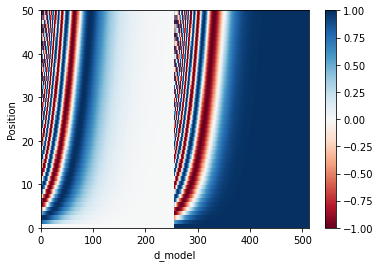

In [163]:
plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('d_model')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [164]:
class Encoder(tf.keras.layers.Layer):
  # Encoder 的初始參數除了本來就要給 EncoderLayer 的參數還多了：
  # - num_layers: 決定要有幾個 EncoderLayers, 前面影片中的 `N`
  # - input_vocab_size: 用來把索引轉成詞嵌入向量
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    
    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(input_vocab_size, self.d_model)
    
    # 建立 `num_layers` 個 EncoderLayers
    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]

    self.dropout = tf.keras.layers.Dropout(rate)
        
  def call(self, x, training, mask):
    # 輸入的 x.shape == (batch_size, input_seq_len)
    # 以下各 layer 的輸出皆為 (batch_size, input_seq_len, d_model)
    input_seq_len = tf.shape(x)[1]
    
    # 將 2 維的索引序列轉成 3 維的詞嵌入張量，並依照論文乘上 sqrt(d_model)
    # 再加上對應長度的位置編碼
    x = self.embedding(x)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :input_seq_len, :]

    # 對 embedding 跟位置編碼的總合做 regularization
    # 這在 Decoder 也會做
    x = self.dropout(x, training=training)
    
    # 通過 N 個 EncoderLayer 做編碼
    for i, enc_layer in enumerate(self.enc_layers):
      x = enc_layer(x, training, mask)
      # 以下只是用來 demo EncoderLayer outputs
      #print('-' * 20)
      #print(f"EncoderLayer {i + 1}'s output:", x)
      
    
    return x 

In [165]:
# 超參數
num_layers = 2 # 2 層的 Encoder
d_model = 4
num_heads = 2
dff = 8
input_vocab_size = subword_encoder_ch.vocab_size + 2 # 記得加上 <start>, <end>

# 初始化一個 Encoder
encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size)

# 將 2 維的索引序列丟入 Encoder 做編碼
enc_out = encoder(inp, training=False, mask=None)
print("inp:", inp)
print("-" * 20)
print("enc_out:", enc_out)

inp: tf.Tensor(
[[8435    5 6516  146 3858 1672 8211 8436    0    0]
 [8435  345 1760  469 1131 2044 1817 6923   97 8436]], shape=(2, 10), dtype=int64)
--------------------
enc_out: tf.Tensor(
[[[-0.83610994 -0.5481087  -0.31845003  1.7026687 ]
  [-0.58057255 -0.4860412  -0.66207147  1.7286853 ]
  [-0.42363334 -0.03565829 -1.1330314   1.592323  ]
  [-0.5961983   0.37365934 -1.2078502   1.4303892 ]
  [-0.9248689   0.23986341 -0.85174567  1.5367513 ]
  [-1.0248368  -0.15107548 -0.46927926  1.6451916 ]
  [-0.9004431  -0.495825   -0.2939778   1.6902459 ]
  [-0.693853   -0.49514955 -0.53831035  1.7273129 ]
  [-0.39859828 -0.13082337 -1.0924646   1.6218864 ]
  [-0.49760455  0.35903174 -1.274937    1.4135098 ]]

 [[-0.82740587 -0.58240277 -0.2906911   1.7004997 ]
  [-0.5849646  -0.556896   -0.59005064  1.7319112 ]
  [-0.3260328  -0.00793445 -1.2182711   1.5522383 ]
  [-0.5846866   0.39317098 -1.2243195   1.4158351 ]
  [-0.89239967  0.21091054 -0.8689904   1.5504795 ]
  [-1.0038097  -0.1876796

In [166]:
class Decoder(tf.keras.layers.Layer):
  # 初始參數跟 Encoder 只差在用 `target_vocab_size` 而非 `inp_vocab_size`
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, 
               rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    
    # 為中文（目標語言）建立詞嵌入層
    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(target_vocab_size, self.d_model)
    
    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)
  
  # 呼叫時的參數跟 DecoderLayer 一模一樣
  def call(self, x, enc_output, training, 
           combined_mask, inp_padding_mask):
    
    tar_seq_len = tf.shape(x)[1]
    attention_weights = {}  # 用來存放每個 Decoder layer 的注意權重
    
    # 這邊跟 Encoder 做的事情完全一樣
    x = self.embedding(x)  # (batch_size, tar_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :tar_seq_len, :]
    x = self.dropout(x, training=training)

    
    for i, dec_layer in enumerate(self.dec_layers):
      x, block1, block2 = dec_layer(x, enc_output, training,
                                    combined_mask, inp_padding_mask)
      
      # 將從每個 Decoder layer 取得的注意權重全部存下來回傳，方便我們觀察
      attention_weights['decoder_layer{}_block1'.format(i + 1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i + 1)] = block2
    
    # x.shape == (batch_size, tar_seq_len, d_model)
    return x, attention_weights

In [167]:
# 超參數
num_layers = 2 # 2 層的 Decoder
d_model = 4
num_heads = 2
dff = 8
target_vocab_size = subword_encoder_zh.vocab_size + 2 # 記得加上 <start>, <end>

# 遮罩
inp_padding_mask = create_padding_mask(inp)
tar_padding_mask = create_padding_mask(tar)
look_ahead_mask = create_look_ahead_mask(tar.shape[1])
combined_mask = tf.math.maximum(tar_padding_mask, look_ahead_mask)

# 初始化一個 Decoder
decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size)

# 將 2 維的索引序列以及遮罩丟入 Decoder
print("tar:", tar)
print("-" * 20)
print("combined_mask:", combined_mask)
print("-" * 20)
print("enc_out:", enc_out)
print("-" * 20)
print("inp_padding_mask:", inp_padding_mask)
print("-" * 20)
dec_out, attn = decoder(tar, enc_out, training=False, 
                        combined_mask=combined_mask,
                        inp_padding_mask=inp_padding_mask)
print("dec_out:", dec_out)
print("-" * 20)
for block_name, attn_weights in attn.items():
  print(f"{block_name}.shape: {attn_weights.shape}")

tar: tf.Tensor(
[[299 159 148  75 159 158 147 140 148  75 147 153 146  75 159 158 148 153
  146  75 148 160  75 150 148  92  75 159 158 147 144 153 153  75 159 158
  147 140 148 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [299 147 160 140 153  75 159 154  75 159 153 146  75 151 148  75 148 154
  153 146  75 150 147 160 140 153  75 155 154  75 144  75 158 144 153 153
   75 159 147 140 148  75 147 154 153 146  75 159 148  75 147 160 140 159
  300]], shape=(2, 55), dtype=int64)
--------------------
combined_mask: tf.Tensor(
[[[[0. 1. 1. ... 1. 1. 1.]
   [0. 0. 1. ... 1. 1. 1.]
   [0. 0. 0. ... 1. 1. 1.]
   ...
   [0. 0. 0. ... 1. 1. 1.]
   [0. 0. 0. ... 1. 1. 1.]
   [0. 0. 0. ... 1. 1. 1.]]]


 [[[0. 1. 1. ... 1. 1. 1.]
   [0. 0. 1. ... 1. 1. 1.]
   [0. 0. 0. ... 1. 1. 1.]
   ...
   [0. 0. 0. ... 0. 1. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 0.]]]], shape=(2, 1, 55, 55), dtype=float32)
--------------------
enc_out: tf.Tensor(
[[[-0.83610994 -0.5481087

In [168]:
# Transformer 之上已經沒有其他 layers 了，我們使用 tf.keras.Model 建立一個模型
class Transformer(tf.keras.Model):
  # 初始參數包含 Encoder & Decoder 都需要超參數以及中英字典數目
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, rate)
    # 這個 FFN 輸出跟中文字典一樣大的 logits 數，等通過 softmax 就代表每個中文字的出現機率
    self.final_layer = tf.keras.layers.Dense(target_vocab_size)
  
  # enc_padding_mask 跟 dec_padding_mask 都是英文序列的 padding mask，
  # 只是一個給 Encoder layer 的 MHA 用，一個是給 Decoder layer 的 MHA 2 使用
  def call(self, inp, tar, training, enc_padding_mask, 
           combined_mask, dec_padding_mask):

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)
    
    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, combined_mask, dec_padding_mask)
    
    # 將 Decoder 輸出通過最後一個 linear layer
    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)
    
    return final_output, attention_weights

In [169]:
# 超參數
num_layers = 1
d_model = 4
num_heads = 2
dff = 8

# + 2 是為了 <start> & <end> token
input_vocab_size = subword_encoder_ch.vocab_size + 2
output_vocab_size = subword_encoder_zh.vocab_size + 2

# 重點中的重點。訓練時用前一個字來預測下一個中文字
tar_inp = tar[:, :-1]
tar_real = tar[:, 1:]

# 來源 / 目標語言用的遮罩。注意 `comined_mask` 已經將目標語言的兩種遮罩合而為一
inp_padding_mask = create_padding_mask(inp)
tar_padding_mask = create_padding_mask(tar_inp)
look_ahead_mask = create_look_ahead_mask(tar_inp.shape[1])
combined_mask = tf.math.maximum(tar_padding_mask, look_ahead_mask)

# 初始化我們的第一個 transformer
transformer = Transformer(num_layers, d_model, num_heads, dff, 
                          input_vocab_size, output_vocab_size)

# 將英文、中文序列丟入取得 Transformer 預測下個中文字的結果
predictions, attn_weights = transformer(inp, tar_inp, False, inp_padding_mask, 
                                        combined_mask, inp_padding_mask)

print("tar:", tar)
print("-" * 20)
print("tar_inp:", tar_inp)
print("-" * 20)
print("tar_real:", tar_real)
print("-" * 20)
print("predictions:", predictions)

tar: tf.Tensor(
[[299 159 148  75 159 158 147 140 148  75 147 153 146  75 159 158 148 153
  146  75 148 160  75 150 148  92  75 159 158 147 144 153 153  75 159 158
  147 140 148 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [299 147 160 140 153  75 159 154  75 159 153 146  75 151 148  75 148 154
  153 146  75 150 147 160 140 153  75 155 154  75 144  75 158 144 153 153
   75 159 147 140 148  75 147 154 153 146  75 159 148  75 147 160 140 159
  300]], shape=(2, 55), dtype=int64)
--------------------
tar_inp: tf.Tensor(
[[299 159 148  75 159 158 147 140 148  75 147 153 146  75 159 158 148 153
  146  75 148 160  75 150 148  92  75 159 158 147 144 153 153  75 159 158
  147 140 148 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [299 147 160 140 153  75 159 154  75 159 153 146  75 151 148  75 148 154
  153 146  75 150 147 160 140 153  75 155 154  75 144  75 158 144 153 153
   75 159 147 140 148  75 147 154 153 146  75 159 148  75 147 160 140 159]], shape=(

In [170]:
# ...

# tar_inp = tar[:, :-1]
# tar_real = tar[:, 1:]

# predictions, attn_weights = transformer(inp, tar_inp, False, ...)

# ...

In [171]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

# 假設我們要解的是一個 binary classifcation， 0 跟 1 個代表一個 label
real = tf.constant([1, 1, 0], shape=(1, 3), dtype=tf.float32)
pred = tf.constant([[0, 1], [0, 1], [0, 1]], dtype=tf.float32)
loss_object(real, pred)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.31326166, 0.31326166, 1.3132616 ], dtype=float32)>

In [172]:
print("predictions:", predictions)
print("-" * 20)
print(tf.reduce_sum(predictions, axis=-1))

predictions: tf.Tensor(
[[[ 0.0371036  -0.09082927  0.08761619 ... -0.14282139  0.30328718
    0.02944443]
  [ 0.05681565 -0.09030984  0.12798868 ... -0.20192894  0.24050121
    0.16150321]
  [ 0.08144398 -0.08480393  0.15238322 ... -0.2348526   0.16503304
    0.24933794]
  ...
  [ 0.04802005 -0.0917501   0.10511958 ... -0.16824068  0.27904114
    0.08221759]
  [ 0.07337705 -0.08651344  0.14689095 ... -0.22791053  0.18682683
    0.22955143]
  [ 0.0788606  -0.08779997  0.14428017 ... -0.22320013  0.18986613
    0.21393521]]

 [[ 0.04011481 -0.09098285  0.08857557 ... -0.1438465   0.29997015
    0.03078423]
  [ 0.05464662 -0.09061378  0.12517595 ... -0.19797711  0.24695434
    0.15196118]
  [ 0.07796958 -0.08426903  0.15287277 ... -0.23608096  0.16558647
    0.25437525]
  ...
  [ 0.05083483 -0.09159115  0.11342346 ... -0.1805873   0.26715267
    0.11017494]
  [ 0.07521747 -0.08438475  0.15212214 ... -0.23537682  0.16970046
    0.25286674]
  [ 0.08068422 -0.08690946  0.14720674 ... -0.227

In [173]:
def loss_function(real, pred):
  # 這次的 mask 將序列中不等於 0 的位置視為 1，其餘為 0 
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  # 照樣計算所有位置的 cross entropy 但不加總
  loss_ = loss_object(real, pred)
  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask  # 只計算非 <pad> 位置的損失 
  
  return tf.reduce_mean(loss_)

In [174]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
    name='train_accuracy')

In [175]:
num_layers = 4 
d_model = 128
dff = 512
num_heads = 8

input_vocab_size = subword_encoder_ch.vocab_size + 2
target_vocab_size = subword_encoder_zh.vocab_size + 2
dropout_rate = 0.1  # 預設值

print("input_vocab_size:", input_vocab_size)
print("target_vocab_size:", target_vocab_size)

input_vocab_size: 8437
target_vocab_size: 301


In [176]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  # 論文預設 `warmup_steps` = 4000
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps
    
  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
  
# 將客製化 learning rate schdeule 丟入 Adam opt.
# Adam opt. 的參數都跟論文相同
learning_rate = CustomSchedule(d_model)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

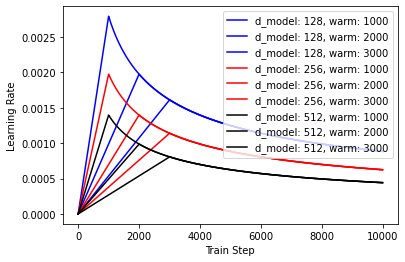

In [177]:
d_models = [128, 256, 512]
warmup_steps = [1000 * i for i in range(1, 4)]

schedules = []
labels = []
colors = ["blue", "red", "black"]
for d in d_models:
  schedules += [CustomSchedule(d, s) for s in warmup_steps]
  labels += [f"d_model: {d}, warm: {s}" for s in warmup_steps]

for i, (schedule, label) in enumerate(zip(schedules, labels)):
  plt.plot(schedule(tf.range(10000, dtype=tf.float32)), 
           label=label, color=colors[i // 3])

plt.legend()

plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [178]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, dropout_rate)

print(f"""這個 Transformer 有 {num_layers} 層 Encoder / Decoder layers
d_model: {d_model}
num_heads: {num_heads}
dff: {dff}
input_vocab_size: {input_vocab_size}
target_vocab_size: {target_vocab_size}
dropout_rate: {dropout_rate}

""")

這個 Transformer 有 4 層 Encoder / Decoder layers
d_model: 128
num_heads: 8
dff: 512
input_vocab_size: 8437
target_vocab_size: 301
dropout_rate: 0.1




In [179]:
train_perc = 10
val_prec = 1
drop_prec = 100 - train_perc - val_prec

# 方便比較不同實驗/ 不同超參數設定的結果
run_id = f"{num_layers}layers_{d_model}d_{num_heads}heads_{dff}dff_{train_perc}train_perc"
checkpoint_path = os.path.join(checkpoint_path, run_id)
log_dir = os.path.join(log_dir, run_id)

# tf.train.Checkpoint 可以幫我們把想要存下來的東西整合起來，方便儲存與讀取
# 一般來說你會想存下模型以及 optimizer 的狀態
ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

# ckpt_manager 會去 checkpoint_path 看有沒有符合 ckpt 裡頭定義的東西
# 存檔的時候只保留最近 5 次 checkpoints，其他自動刪除
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# 如果在 checkpoint 路徑上有發現檔案就讀進來
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  
  # 用來確認之前訓練多少 epochs 了
  last_epoch = int(ckpt_manager.latest_checkpoint.split("-")[-1])
  print(f'已讀取最新的 checkpoint，模型已訓練 {last_epoch} epochs。')
else:
  last_epoch = 0
  print("沒找到 checkpoint，從頭訓練。")

已讀取最新的 checkpoint，模型已訓練 150 epochs。


In [180]:
# 為 Transformer 的 Encoder / Decoder 準備遮罩
def create_masks(inp, tar):
  # 中文句子的 padding mask，要交給 Encoder layer 自注意力機制用的
  enc_padding_mask = create_padding_mask(inp)
  
  # 同樣也是中文句子的 padding mask，但是是要交給 Decoder layer 的 MHA 2 
  # 關注 Encoder 輸出序列用的
  dec_padding_mask = create_padding_mask(inp)
  
  # Decoder layer 的 MHA1 在做自注意力機制用的
  # `combined_mask` 是台語句子的 padding mask 跟 look ahead mask 的疊加
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
  return enc_padding_mask, combined_mask, dec_padding_mask

In [181]:
@tf.function  # 讓 TensorFlow 幫我們將 eager code 優化並加快運算
def train_step(inp, tar):
  # 前面說過的，用去尾的原始序列去預測下一個字的序列
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]
  
  # 建立 3 個遮罩
  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  
  # 紀錄 Transformer 的所有運算過程以方便之後做梯度下降
  with tf.GradientTape() as tape:
    # 注意是丟入 `tar_inp` 而非 `tar`。記得將 `training` 參數設定為 True
    predictions, _ = transformer(inp, tar_inp, 
                                 True, 
                                 enc_padding_mask, 
                                 combined_mask, 
                                 dec_padding_mask)
    # 跟影片中顯示的相同，計算左移一個字的序列跟模型預測分佈之間的差異，當作 loss
    loss = loss_function(tar_real, predictions)

  # 取出梯度並呼叫前面定義的 Adam optimizer 幫我們更新 Transformer 裡頭可訓練的參數
  gradients = tape.gradient(loss, transformer.trainable_variables)    
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  # 將 loss 以及訓練 acc 記錄到 TensorBoard 上，非必要
  train_loss(loss)
  train_accuracy(tar_real, predictions)

In [182]:
# 定義我們要看幾遍數據集
EPOCHS = 150
print(f"此超參數組合的 Transformer 已經訓練 {last_epoch} epochs。")
print(f"剩餘 epochs：{min(0, last_epoch - EPOCHS)}")


# 用來寫資訊到 TensorBoard，非必要但十分推薦
summary_writer = tf.summary.create_file_writer(log_dir)

# 比對設定的 `EPOCHS` 以及已訓練的 `last_epoch` 來決定還要訓練多少 epochs
for epoch in range(last_epoch, EPOCHS):
  start = time.time()
  
  # 重置紀錄 TensorBoard 的 metrics
  train_loss.reset_states()
  train_accuracy.reset_states()
  
  # 一個 epoch 就是把我們定義的訓練資料集一個一個 batch 拿出來處理，直到看完整個數據集 
  for (step_idx, (inp, tar)) in enumerate(train_dataset):
    
    # 每次 step 就是將數據丟入 Transformer，讓它生預測結果並計算梯度最小化 loss
    train_step(inp, tar)  

  # 每個 epoch 完成就存一次檔    
  if (epoch + 1) % 1 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
  # 將 loss 以及 accuracy 寫到 TensorBoard 上
  with summary_writer.as_default():
    tf.summary.scalar("train_loss", train_loss.result(), step=epoch + 1)
    tf.summary.scalar("train_acc", train_accuracy.result(), step=epoch + 1)
  
  print('Epoch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch + 1, 
                                                train_loss.result(), 
                                                train_accuracy.result()))
  print('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

此超參數組合的 Transformer 已經訓練 150 epochs。
剩餘 epochs：0


In [183]:
# # 87 分，不能再高了。
# for epoch in range(EPOCHS):
#   for inp, tar in train_dataset:
#     train_step(inp, tar)

In [184]:
# %load_ext tensorboard
# %tensorboard --logdir {your_log_dir}

In [185]:
# 給定一個英文句子，輸出預測的中文索引數字序列以及注意權重 dict
def evaluate(inp_sentence):
  
  # 準備英文句子前後會加上的 <start>, <end>
  start_token = [subword_encoder_ch.vocab_size]
  end_token = [subword_encoder_ch.vocab_size + 1]
  
  # inp_sentence 是字串，我們用 Subword Tokenizer 將其變成子詞的索引序列
  # 並在前後加上 BOS / EOS
  inp_sentence = start_token + subword_encoder_ch.encode(inp_sentence) + end_token
  encoder_input = tf.expand_dims(inp_sentence, 0)
  
  # 跟我們在影片裡看到的一樣，Decoder 在第一個時間點吃進去的輸入
  # 是一個只包含一個中文 <start> token 的序列
  decoder_input = [subword_encoder_zh.vocab_size]
  output = tf.expand_dims(decoder_input, 0)  # 增加 batch 維度
  
  # auto-regressive，一次生成一個中文字並將預測加到輸入再度餵進 Transformer
  for i in range(MAX_LENGTH):
    # 每多一個生成的字就得產生新的遮罩
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(
        encoder_input, output)
  
    # predictions.shape == (batch_size, seq_len, vocab_size)
    predictions, attention_weights = transformer(encoder_input, 
                                                 output,
                                                 False,
                                                 enc_padding_mask,
                                                 combined_mask,
                                                 dec_padding_mask)
    

    # 將序列中最後一個 distribution 取出，並將裡頭值最大的當作模型最新的預測字
    predictions = predictions[: , -1:, :]  # (batch_size, 1, vocab_size)

    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    
    # 遇到 <end> token 就停止回傳，代表模型已經產生完結果
    if tf.equal(predicted_id, subword_encoder_zh.vocab_size + 1):
      return tf.squeeze(output, axis=0), attention_weights
    
    #將 Transformer 新預測的中文索引加到輸出序列中，讓 Decoder 可以在產生
    # 下個中文字的時候關注到最新的 `predicted_id`
    output = tf.concat([output, predicted_id], axis=-1)

  # 將 batch 的維度去掉後回傳預測的中文索引序列
  return tf.squeeze(output, axis=0), attention_weights

In [186]:
# 要被翻譯的英文句子
sentence = "反倒轉利用環保的生態防治法"

# 取得預測的中文索引序列
predicted_seq, _ = evaluate(sentence)

# 過濾掉 <start> & <end> tokens 並用中文的 subword tokenizer 幫我們將索引序列還原回中文句子
target_vocab_size = subword_encoder_zh.vocab_size
predicted_seq_without_bos_eos = [idx for idx in predicted_seq if idx < target_vocab_size]
predicted_sentence = subword_encoder_zh.decode(predicted_seq_without_bos_eos)

print("sentence:", sentence)
print("-" * 20)
print("predicted_seq:", predicted_seq)
print("-" * 20)
print("predicted_sentence:", predicted_sentence)

sentence: 反倒轉利用環保的生態防治法
--------------------
predicted_seq: tf.Tensor(
[299 155 148 140 153  93  88 159 154  93  88 151 148  98  88 148 154 153
 146  98  75 155 147 160 140 153  98  88 159 140 148  96  75 147 154 153
 146  96  75   2], shape=(40,), dtype=int32)
--------------------
predicted_sentence: pian2-to2-li7-iong7 phuan7-tai5 hong5 。


In [ ]:
test = pd.read_csv(test_x_path, sep=",", header=None)#, quoting=2
#metadata_df.head(3)
test.columns = ["id", "txt"]
test = test[["id", "txt"]]
test = test.drop(0)

test_x = test["txt"].values
print(len(test_x))
submit_ans = []
count = 1
for i in test_x:
    # 取得預測的中文索引序列
  predicted_seq, _ = evaluate(i)

  # 過濾掉 <start> & <end> tokens 並用中文的 subword tokenizer 幫我們將索引序列還原回中文句子
  target_vocab_size = subword_encoder_zh.vocab_size
  predicted_seq_without_bos_eos = [idx for idx in predicted_seq if idx < target_vocab_size]
  predicted_sentence = subword_encoder_zh.decode(predicted_seq_without_bos_eos)

  # print("sentence:", i)
  print(count)
  # print("-" * 20)
  #print("predicted_seq:", predicted_seq)
  # # print("-" * 20)
  print("predicted_sentence:", predicted_sentence)
  submit_ans.append(predicted_sentence)
  count = count + 1



#MAE(valid_y,submit_ans)


In [ ]:
import csv

# co_id_np = np.array(co_id)
# year_np = np.array(year)

# data = np.array([co_id_np, year_np])

# np.savetxt("sample.csv", data.T, fmt='%s', delimiter='\t')
test_id = list(range(1,641+1))    
#with open('submit.csv', 'w', newline='',encoding='UTF-8-sig') as test_file:

# !ls
with open('311581024.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['id', 'txt'])
    for x,y in zip (test_id,submit_ans):
        writer.writerow([x,y])

In [ ]:
transformer.summary()

In [ ]:
predicted_seq, attention_weights = evaluate(sentence)

# 在這邊我們自動選擇最後一個 Decoder layer 的 MHA 2，也就是 Decoder 關注 Encoder 的 MHA
layer_name = f"decoder_layer{num_layers}_block2"

print("sentence:", sentence)
print("-" * 20)
print("predicted_seq:", predicted_seq)
print("-" * 20)
print("attention_weights.keys():")
for layer_name, attn in attention_weights.items():
  print(f"{layer_name}.shape: {attn.shape}")
print("-" * 20)
print("layer_name:", layer_name)

In [ ]:
# import matplotlib as mpl
# # 你可能會需要自行下載一個中文字體檔案以讓 matplotlib 正確顯示中文
# zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/SimHei/simhei.ttf')
# plt.style.use("seaborn-whitegrid")

# # 這個函式將英 -> 中翻譯的注意權重視覺化（注意：我們將注意權重 transpose 以最佳化渲染結果
# def plot_attention_weights(attention_weights, sentence, predicted_seq, layer_name, max_len_tar=None):
    
#   fig = plt.figure(figsize=(17, 7))
  
#   sentence = subword_encoder_ch.encode(sentence)
  
#   # 只顯示中文序列前 `max_len_tar` 個字以避免畫面太過壅擠
#   if max_len_tar:
#     predicted_seq = predicted_seq[:max_len_tar]
#   else:
#     max_len_tar = len(predicted_seq)
  
#   # 將某一個特定 Decoder layer 裡頭的 MHA 1 或 MHA2 的注意權重拿出來並去掉 batch 維度
#   attention_weights = tf.squeeze(attention_weights[layer_name], axis=0)  
#   # (num_heads, tar_seq_len, inp_seq_len)
  
#   # 將每個 head 的注意權重畫出
#   for head in range(attention_weights.shape[0]):
#     ax = fig.add_subplot(2, 4, head + 1)

#     # [注意]我為了將長度不短的英文子詞顯示在 y 軸，將注意權重做了 transpose
#     attn_map = np.transpose(attention_weights[head][:max_len_tar, :])
#     ax.matshow(attn_map, cmap='viridis')  # (inp_seq_len, tar_seq_len)
    
#     fontdict = {"fontproperties": zhfont}
    
#     ax.set_xticks(range(max(max_len_tar, len(predicted_seq))))
#     ax.set_xlim(-0.5, max_len_tar -1.5)
    
#     ax.set_yticks(range(len(sentence) + 2))
#     ax.set_xticklabels([subword_encoder_zh.decode([i]) for i in predicted_seq 
#                         if i < subword_encoder_zh.vocab_size], 
#                        fontdict=fontdict, fontsize=18)    
    
#     ax.set_yticklabels(
#         ['<start>'] + [subword_encoder_ch.decode([i]) for i in sentence] + ['<end>'], 
#         fontdict=fontdict)
    
#     ax.set_xlabel('Head {}'.format(head + 1))
#     ax.tick_params(axis="x", labelsize=12)
#     ax.tick_params(axis="y", labelsize=12)
  
#   plt.tight_layout()
#   plt.show()
#   plt.close(fig)

In [ ]:
# plot_attention_weights(attention_weights, sentence, 
#                        predicted_seq, layer_name, max_len_tar=18)

In [ ]:
os.chdir("/content/drive/MyDrive/nycu/2022ML/translate/ml-2022-nycu-translation")
!pip install pipreqs
!pipreqs --force
!pip freeze > requirements.txt
import sys
print(sys.modules.keys())